<a href="https://colab.research.google.com/github/engineerchacon/Maestria-en-Inteligencia-Artificial-y-Analitica-de-Datos-Colab-Files/blob/main/Pr%C3%A1ctica_10_An%C3%A1lisis_de_Ventas_con_GridSpec_Armando_Chac%C3%B3n_Terrazas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Instrucciones:**

Objetivo
Utilizar GridSpec para organizar subplots de diferentes tamaños en un análisis de ventas.

Instrucciones:
Genera un DataFrame de ventas con Mes, Ventas, y Gastos. Utiliza randint para generar números aleatorios enteros. Para ventas los valores deben estar entre 2000 y 5000. Para gastos, los valores debn estar entre 1000 y 4000.
Usa GridSpec para organizar los subplots de la siguiente manera:
Primer gráfico (barra, ocupando dos columnas)
Segundo gráfico (línea, una columna)
Tercer gráfico (dispersión, dos filas).
Agrega títulos y ajusta espacios.

# **Cargar Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Importar librerías**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec  # Importamos GridSpec específicamente

# **Genera un DataFrame de ventas**

In [ ]:
# Genera un DataFrame de ventas con Mes, Ventas, y Gastos.
# Utiliza randint para generar números aleatorios enteros.
# Para ventas los valores deben estar entre 2000 y 5000. Para gastos, los valores deben estar entre 1000 y 4000.
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
         'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

# Generamos datos aleatorios para ventas (entre 2000 y 5000)
ventas = np.random.randint(2000, 5001, 12)
# Generamos datos aleatorios para gastos (entre 1000 y 4000)
gastos = np.random.randint(1000, 4001, 12)
# Creamos el DataFrame con los datos generados
df_ventas = pd.DataFrame({
    'Mes': meses,
    'Ventas': ventas,
    'Gastos': gastos
})

# **Usa GridSpec**

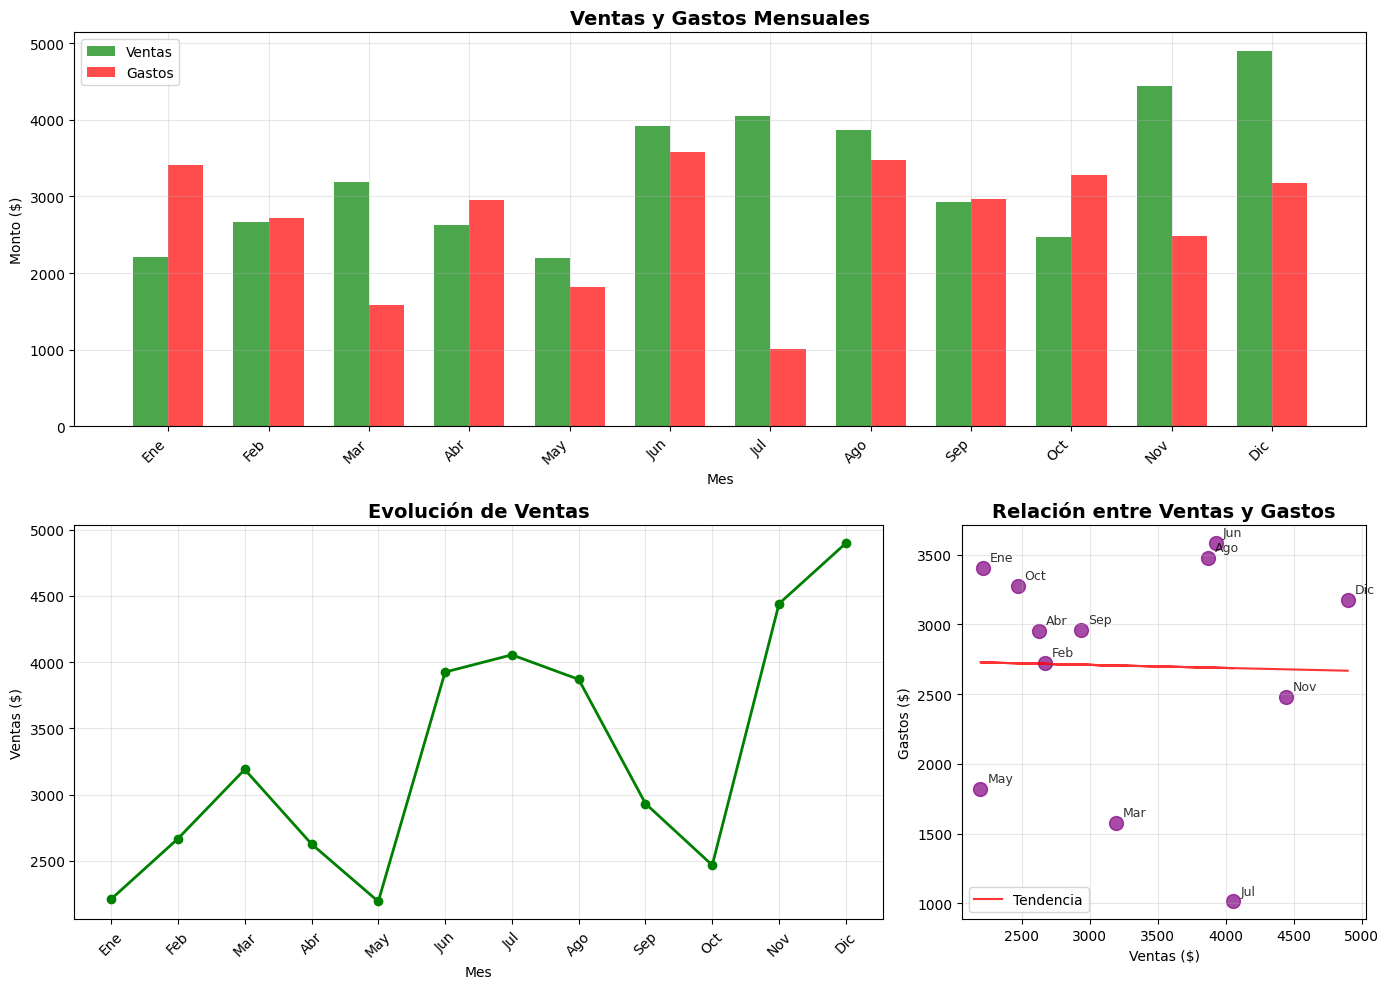

In [ ]:
# Creamos una figura con un un buen tamaño para evitar superposiciones
fig = plt.figure(figsize=(14, 10))

# Usamos GridSpec para definir una cuadrícula de 2 filas y 2 columnas
gs = GridSpec(2, 2, figure=fig, width_ratios=[2, 1], height_ratios=[1, 1])

#Primer gráfico - Gráfico de barras (ocupa dos columnas)
# Creamos el primer subplot que ocupará la primera fila y ambas columnas
ax1 = fig.add_subplot(gs[0, :])
# Configuramos el gráfico de barras para ventas y gastos
ancho_barras = 0.35
x = np.arange(len(df_ventas['Mes']))  # Posiciones en el eje X para los meses
# Barras para ventas
ax1.bar(x - ancho_barras/2, df_ventas['Ventas'], ancho_barras,
        label='Ventas', color='green', alpha=0.7)
# Barras para gastos
ax1.bar(x + ancho_barras/2, df_ventas['Gastos'], ancho_barras,
        label='Gastos', color='red', alpha=0.7)
# Personalizamos el primer gráfico
ax1.set_title('Ventas y Gastos Mensuales', fontsize=14, fontweight='bold')
ax1.set_xlabel('Mes')
ax1.set_ylabel('Monto ($)')
ax1.set_xticks(x)
ax1.set_xticklabels(df_ventas['Mes'], rotation=45, ha='right')  # Rotación y alineación
ax1.legend()
ax1.grid(True, linestyle='-', alpha=0.3)

#Segundo gráfico - Gráfico de línea (una columna)
# Creamos el segundo subplot que ocupará la primera columna de la segunda fila
ax2 = fig.add_subplot(gs[1, 0])
# Configuramos el gráfico de línea para las ventas
ax2.plot(df_ventas['Mes'], df_ventas['Ventas'],
         marker='o', color='green', linewidth=2, markersize=6)
# Personalizamos el segundo gráfico
ax2.set_title('Evolución de Ventas', fontsize=14, fontweight='bold')
ax2.set_xlabel('Mes')
ax2.set_ylabel('Ventas ($)')
ax2.grid(True, linestyle='-', alpha=0.3)
ax2.tick_params(axis='x', rotation=45)  # Rotamos las etiquetas del eje X


# Tercer gráfico - Gráfico de dispersión (dos filas)
# Creamos el tercer subplot que ocupará la segunda columna y abarcará dos filas
ax3 = fig.add_subplot(gs[1, 1])
# Configuramos el gráfico de dispersión entre ventas y gastos
scatter = ax3.scatter(df_ventas['Ventas'], df_ventas['Gastos'],
                      color='purple', s=100, alpha=0.7)
# Añadimos etiquetas con los meses a cada punto del gráfico de dispersión
for i, mes in enumerate(df_ventas['Mes']):
    ax3.annotate(mes,  # Texto a mostrar (el mes)
                (df_ventas['Ventas'][i], df_ventas['Gastos'][i]),  # Coordenadas del punto
                xytext=(5, 5),  # Desplazamiento del texto respecto al punto
                textcoords='offset points',  # Sistema de coordenadas para el desplazamiento
                fontsize=9,  # Tamaño de fuente
                alpha=0.8)  # Transparencia del texto
#Personalizamos el tercer gráfico
ax3.set_title('Relación entre Ventas y Gastos', fontsize=14, fontweight='bold')
ax3.set_xlabel('Ventas ($)')
ax3.set_ylabel('Gastos ($)')
ax3.grid(True, linestyle='-', alpha=0.3)
# Añadimos una línea de tendencia para mostrar la correlación
z = np.polyfit(df_ventas['Ventas'], df_ventas['Gastos'], 1)
p = np.poly1d(z)
ax3.plot(df_ventas['Ventas'], p(df_ventas['Ventas']),
         color='red', linestyle='-', alpha=0.8, label='Tendencia')
ax3.legend()

# Ajustar espacios y mostrar el gráfico
# Ajustamos los espacios entre subplots para evitar superposiciones
plt.tight_layout()

# Mostramos la figura con todos los gráficos
plt.show()